#MRI Classification Project with Resnet vs. Hybrid Model



## Links to data:
https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data

https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/data


#### Description: The task is to classify brain MRI images into four categories: meningioma, pituitary tumor, glioma, and no tumor. This is a multi-class classification problem, where the goal is to identify the presence and type of brain tumor based on patterns in MRI scans.

#### Goal: The project will set a baseline accuracy using Resnet, and will attempt to score a higher test accuracy using a hybrid model- Resnet + Adaboost. It will also which model performs better with different conditions.


Glioma Example: Can be identified by the darker core.

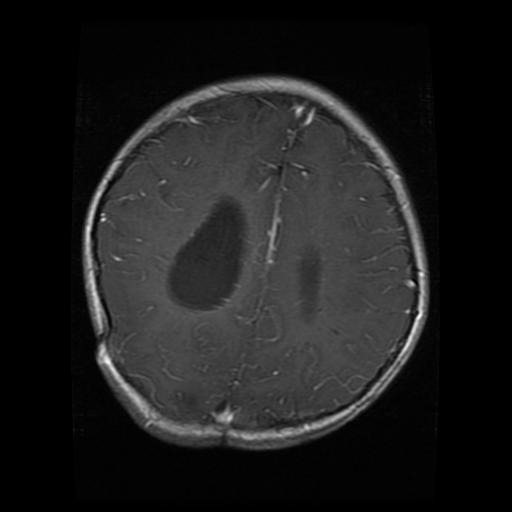


Meningioma Example: Can be identified by white blob - meningiomas light up vividly on scans.

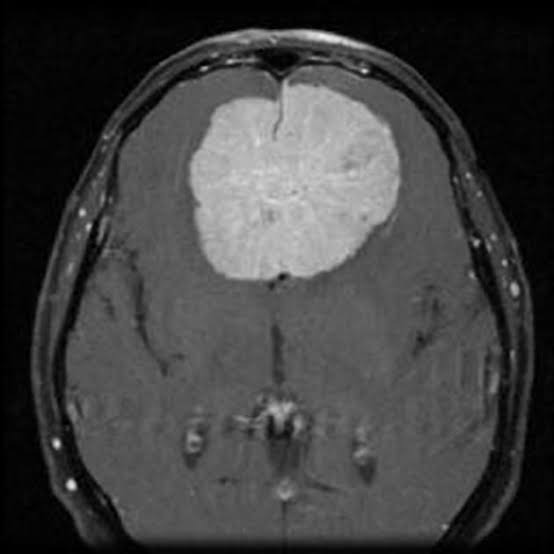

Pituitary Example: Can be identifed by the light gray oval one-third of the way down from the top behind the eyes.

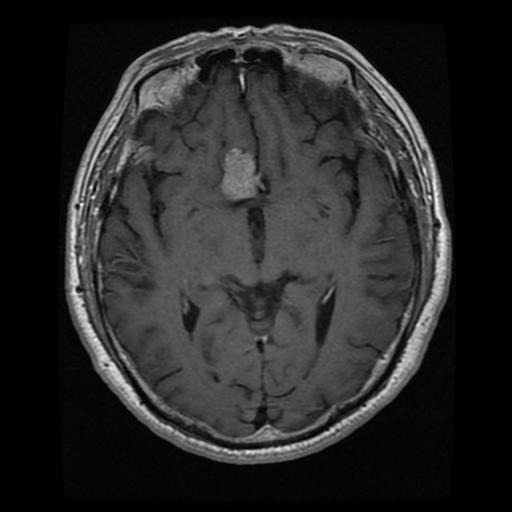

No Tumor Example: There are is no evidence of any tumors, nothing out of the ordinary - no light grey/dark ovals that stand out as a tumor.

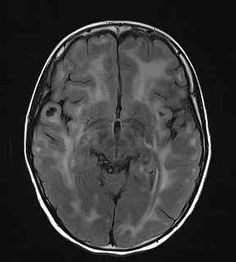

In [ ]:
#Include basic Libraries and Directives
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pandas as pd
%matplotlib inline
from IPython.display import clear_output


In [ ]:
#Import the images
#Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#path to images

path = "/content/drive/MyDrive/MRI_Brain"
train_path = path + '/Training'
test_path = path + '/Testing'

In [ ]:
#Include libraries
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models

## First, there needs to be a baseline accuracy to compare the hybrid model, I will use a standard pretrained Resnet18 model, which is lightweight and should perform well on this task.


In [ ]:
#Code for loading in the datasets

from torchvision import datasets, transforms
from torch.utils.data import DataLoader


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


#Getting the datasets from the image folder
train_dataset = datasets.ImageFolder(train_path, transform=transform)
val_dataset = datasets.ImageFolder(test_path, transform=transform)

#Dataloaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

#print size of datasets
print("Training set size:", len(train_dataset))
print("Validation set size:", len(val_dataset))

Training set size: 5712
Validation set size: 1311


In [ ]:
!pip install torch torchvision

In [ ]:
# Load pretrained ResNet18
model = models.resnet18(pretrained=True)


# Replace final layer
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)


In [ ]:
!pip install tqdm


# Running the baseline Resnet18 to get baseline accuracy

In [ ]:

import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import models
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_epochs  = 15
num_classes = 4
print(f"Using device: {device}")


Using device: cuda


In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import models
import torch.nn as nn, torch.optim as optim

device     = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 15
num_classes = 4  # set to your actual number of classes

#model and optimizer
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, num_classes)optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

model = model.to(device)

optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


Epoch [1/15]: 100%|██████████| 90/90 [00:12<00:00,  7.42it/s, acc=73.9, loss=0.19]

Epoch 1 — Avg Loss: 0.7531, Train Acc: 73.88%


Validation Acc: 70.67%



Epoch [2/15]: 100%|██████████| 90/90 [00:11<00:00,  7.66it/s, acc=85.9, loss=0.11]

Epoch 2 — Avg Loss: 0.4354, Train Acc: 85.92%


Validation Acc: 74.66%



Epoch [3/15]: 100%|██████████| 90/90 [00:12<00:00,  7.32it/s, acc=87.6, loss=0.0913]

Epoch 3 — Avg Loss: 0.3623, Train Acc: 87.59%


Validation Acc: 74.84%



Epoch [4/15]: 100%|██████████| 90/90 [00:11<00:00,  7.57it/s, acc=88.5, loss=0.0832]

Epoch 4 — Avg Loss: 0.3299, Train Acc: 88.53%


Validation Acc: 76.72%



Epoch [5/15]: 100%|██████████| 90/90 [00:11<00:00,  7.53it/s, acc=89.1, loss=0.0778]

Epoch 5 — Avg Loss: 0.3088, Train Acc: 89.08%


Validation Acc: 76.83%



Epoch [6/15]: 100%|██████████| 90/90 [00:11<00:00,  7.56it/s, acc=90.1, loss=0.0741]

Epoch 6 — Avg Loss: 0.2939, Train Acc: 90.06%


Validation Acc: 77.71%



Epoch [7/15]: 100%|██████████| 90/90 [00:11<00:00,  7.52it/s, acc=90.8, loss=0.068]

Epoch 7 — Avg Loss: 0.2698, Train Acc: 90.81%


Validation Acc: 79.47%



Epoch [8/15]: 100%|██████████| 90/90 [00:12<00:00,  7.38it/s, acc=90.3, loss=0.0692]

Epoch 8 — Avg Loss: 0.2747, Train Acc: 90.28%


Validation Acc: 79.77%



Epoch [9/15]: 100%|██████████| 90/90 [00:12<00:00,  7.25it/s, acc=90.7, loss=0.0655]

Epoch 9 — Avg Loss: 0.2598, Train Acc: 90.70%


Validation Acc: 79.94%



Epoch [10/15]: 100%|██████████| 90/90 [00:12<00:00,  7.45it/s, acc=90.8, loss=0.063]

Epoch 10 — Avg Loss: 0.2498, Train Acc: 90.83%


Validation Acc: 80.35%



Epoch [11/15]: 100%|██████████| 90/90 [00:11<00:00,  7.52it/s, acc=91.7, loss=0.0609]

Epoch 11 — Avg Loss: 0.2416, Train Acc: 91.70%


Validation Acc: 80.76%



Epoch [12/15]: 100%|██████████| 90/90 [00:11<00:00,  7.64it/s, acc=91.6, loss=0.0599]

Epoch 12 — Avg Loss: 0.2377, Train Acc: 91.58%


Validation Acc: 81.06%



Epoch [13/15]: 100%|██████████| 90/90 [00:11<00:00,  7.55it/s, acc=92.1, loss=0.0587]

Epoch 13 — Avg Loss: 0.2327, Train Acc: 92.12%


Validation Acc: 81.11%



Epoch [14/15]: 100%|██████████| 90/90 [00:11<00:00,  7.61it/s, acc=91.9, loss=0.0581]

Epoch 14 — Avg Loss: 0.2304, Train Acc: 91.91%


Validation Acc: 81.17%



Epoch [15/15]: 100%|██████████| 90/90 [00:12<00:00,  7.38it/s, acc=92.4, loss=0.0549]

Epoch 15 — Avg Loss: 0.2176, Train Acc: 92.38%


Validation Acc: 81.88%



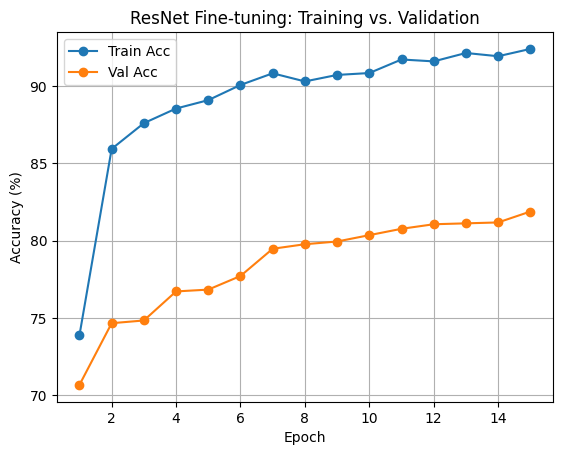

In [ ]:
train_accuracies = []
test_accuracies  = []

for epoch in range(1, num_epochs + 1):
    #training loop
    model.train()
    running_loss = 0.0
    correct      = 0
    total        = 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch}/{num_epochs}]", leave=True)
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss    = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = outputs.max(1)
        total   += labels.size(0)
        correct += (preds == labels).sum().item()

        loop.set_postfix(
            loss = running_loss / (total / inputs.size(0)),
            acc  = 100. * correct / total
        )

    train_acc = 100. * correct / total
    train_accuracies.append(train_acc)
    print(f"Epoch {epoch} — Avg Loss: {running_loss/len(train_loader):.4f}, "
          f"Train Acc: {train_acc:.2f}%")

    #validation
    model.eval()
    correct = 0
    total   = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = outputs.max(1)
            total   += labels.size(0)
            correct += (preds == labels).sum().item()

    test_acc = 100. * correct / total
    test_accuracies.append(test_acc)
    print(f"Validation Acc: {test_acc:.2f}%\n")

#Plot accuracy
plt.plot(range(1, num_epochs + 1), train_accuracies, '-o', label='Train Acc')
plt.plot(range(1, num_epochs + 1), test_accuracies,  '-o', label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('ResNet Fine-tuning: Training vs. Validation')
plt.legend()
plt.grid(True)
plt.show()

The baseline Resnet18 model performs relatively well with around ~82% validation accuracy.

# Resnet + Adaboost Hybrid model

In [ ]:

import torch                               # Core PyTorch
import random                              # Python RNG for reproducibility
import numpy as np                         # Numerical operations
from torchvision import models, transforms, datasets  # Pretrained models & data transforms
from torch.utils.data import DataLoader    # Batch data loading
from sklearn.ensemble import AdaBoostClassifier  # Ensemble method
from sklearn.tree import DecisionTreeClassifier  # Base estimator for AdaBoost
from sklearn.preprocessing import StandardScaler   # Feature scaling
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.metrics import accuracy_score     # Performance metric
import matplotlib.pyplot as plt               # Plotting
from tqdm import tqdm                         # Progress bars

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on: {device}")

# Load pretrained ResNet-18 and strip off its final FC layer
resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
feature_extractor = torch.nn.Sequential(*list(resnet.children())[:-1])

# Freeze all layers
for param in feature_extractor.parameters():
    param.requires_grad = False

# unfreeze only the last residual block
for param in feature_extractor[7].parameters():
    param.requires_grad = True

feature_extractor = feature_extractor.to(device)
#feature_extractor.eval()


Running on: cuda


In [ ]:

# Resize to 224×224, convert to tensor, and normalize
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    ),
])

#Load data
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)


In [ ]:
#Extract features from NN

def extract_features_from_loader(loader):

    features, labels = [], []
    with torch.no_grad():
        for inputs, targets in tqdm(loader, desc="Extracting features"):
            inputs = inputs.to(device)
            out = feature_extractor(inputs)
            out = out.view(out.size(0), -1)
            features.append(out.cpu().numpy())
            labels.extend(targets.cpu().numpy())
    return np.vstack(features), np.array(labels)

# run feature extraction for train and validation sets
X_train, y_train = extract_features_from_loader(train_loader)
X_val,   y_val   = extract_features_from_loader(val_loader)

print(f"Train features shape: {X_train.shape}, Validation features shape: {X_val.shape}")


Extracting features: 100%|██████████| 21/21 [00:03<00:00,  6.79it/s]

Train features shape: (5712, 512), Validation features shape: (1311, 512)


In [ ]:
#scalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)

print("Feature scaling complete.")


Feature scaling complete.


In [ ]:
# Train AdaBoost over multiple spltis

train_accuracies = []
test_accuracies  = []
num_runs = 5

for i in range(num_runs):
    # Split features
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_train, y_train,
        test_size=0.2,
        random_state=i,        # different split each iteration
        stratify=y_train       # preserve class distribution
    )

    # Initialize AdaBoost with depth-3 decision trees
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=3, random_state=seed),
        n_estimators=75,
        learning_rate=0.5,
        random_state=i
    )
    model.fit(X_tr, y_tr)

    #predictions and accuracy
    train_pred = model.predict(X_tr)
    test_pred  = model.predict(X_te)
    train_acc = accuracy_score(y_tr, train_pred)
    test_acc  = accuracy_score(y_te, test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Run {i+1}: Train Acc = {train_acc:.2f}, Test Acc = {test_acc:.2f}")


Run 1: Train Acc = 0.92, Test Acc = 0.85
Run 2: Train Acc = 0.92, Test Acc = 0.83
Run 3: Train Acc = 0.92, Test Acc = 0.85
Run 4: Train Acc = 0.92, Test Acc = 0.84
Run 5: Train Acc = 0.91, Test Acc = 0.80


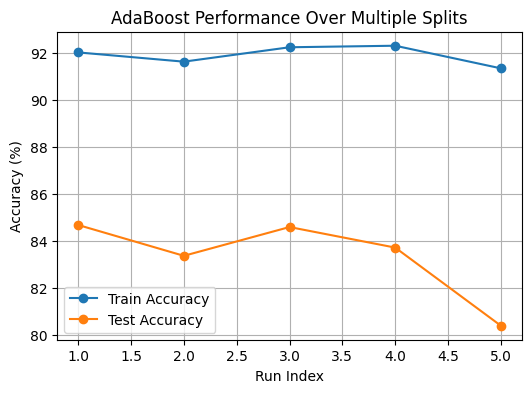

In [ ]:
#plot
plt.figure(figsize=(6, 4))
plt.plot(range(1, num_runs+1), [a*100 for a in train_accuracies], marker='o', label='Train Accuracy')
plt.plot(range(1, num_runs+1), [a*100 for a in test_accuracies],  marker='o', label='Test Accuracy')
plt.xlabel('Run Index')
plt.ylabel('Accuracy (%)')
plt.title('AdaBoost Performance Over Multiple Splits')
plt.legend()
plt.grid(True)
plt.show()


# It appears that, on our current dataset, the optimized hybrid model is outperforming the standalone ResNet. This raises the possibility that our dataset may be too small—in which case I’ll need to acquire additional MRI scans to enlarge it and verify whether the hybrid approach still holds its advantage. Additonally, I will run both models at different capacities of the dataset to see how the accuracies change.










**Running the same models but with different training data sizes**

In [ ]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [ ]:
# Paths for first MRI dataset
path1       = "/content/drive/MyDrive/MRI_Brain"
train_path1 = path1 + "/Training"
test_path1  = path1 + "/Testing"

# Paths for second MRI dataset
path2       = "/content/drive/MyDrive/mriTumor2data"
train_path2 = path2 + "/Training"
test_path2  = path2 + "/Testing"

# Define standard preprocessing for all MRI images:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet channel means
        std=[0.229, 0.224, 0.225]    # ImageNet channel stds
    ),
])


In [ ]:
from torch.utils.data import DataLoader, Subset, ConcatDataset
from sklearn.model_selection import StratifiedShuffleSplit

# Load training datasets separately, then concatenate
train_ds1 = ImageFolder(train_path1, transform=transform)
train_ds2 = ImageFolder(train_path2, transform=transform)
combined_train_ds = ConcatDataset([train_ds1, train_ds2])

# Load validation/testing datasets separately, then concatenate
val_ds1 = ImageFolder(test_path1, transform=transform)
val_ds2 = ImageFolder(test_path2, transform=transform)
combined_val_ds = ConcatDataset([val_ds1, val_ds2])

# Print dataset sizes for verification
print(f"Train images: {len(combined_train_ds)}")
print(f"Validation images: {len(combined_val_ds)}")


Train images: 8592
Validation images: 1705


In [ ]:

# DataLoader for training
train_loader_full = DataLoader(
    combined_train_ds,
    batch_size=64,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

# DataLoader for validation
val_loader = DataLoader(
    combined_val_ds,
    batch_size=64,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)


In [ ]:
# Load pretrained ResNet-18
resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

#  to get feature vectors
feature_extractor = nn.Sequential(*list(resnet.children())[:-1])

#freeze all parameters except the last residual block (layer4)
for param in feature_extractor.parameters():
    param.requires_grad = False
for param in feature_extractor[7].parameters():
    param.requires_grad = True

#move to device and set to evaluation mode
feature_extractor = feature_extractor.to(device).eval()


In [ ]:

X_val, y_val = [], []


val_loader_feat = DataLoader(
    combined_val_ds,
    batch_size=64,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)

with torch.no_grad():  # no grad for faster inference
    for xb, yb in tqdm(val_loader_feat, desc="Extracting val features"):
        xb = xb.to(device)
        # Forward pass through feature extractor, flatten output
        feats = feature_extractor(xb).view(xb.size(0), -1)
        X_val.append(feats.cpu().numpy())
        y_val.extend(yb.numpy())

# Stack into arrays for scikit-learn
X_val = np.vstack(X_val)
y_val = np.array(y_val)

print("Validation features cached.")


Extracting val features: 100%|██████████| 27/27 [00:03<00:00,  6.76it/s]

Validation features cached.


In [ ]:
fractions = [0.01, 0.05, 0.1, 0.5, 1.0]  # Fractions of full training set
pure_resnet_accs = []
hybrid_accs = []

# prepare labels list for sampling
labels_all = []
for ds in (train_ds1, train_ds2):
    labels_all += [sample[1] for sample in ds.samples]

# ResNet
resnet_pt_base = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

for frac in fractions:
    print(f"\n--- Fraction: {frac*100:.0f}% of data ---")
    # determine subset indices
    if frac < 1.0:
        sss = StratifiedShuffleSplit(
            n_splits=1,
            train_size=frac,
            random_state=seed
        )
        idx, _ = next(sss.split(np.zeros(len(labels_all)), labels_all))
    else:
        idx = np.arange(len(labels_all))

    #create subset and loader
    subset = Subset(combined_train_ds, idx)
    loader = DataLoader(
        subset, batch_size=64,
        shuffle=True, num_workers=4, pin_memory=True
    )

    # Hybrid Model: Feature extraction + AdaBoost
    X_sub, y_sub = [], []
    with torch.no_grad():
        for xb, yb in tqdm(loader, desc="Hybrid feat ext"):
            xb = xb.to(device)
            feats = feature_extractor(xb).view(xb.size(0), -1)
            X_sub.append(feats.cpu().numpy())
            y_sub.extend(yb.numpy())
    X_sub = np.vstack(X_sub)

    #standardize features
    scaler = StandardScaler()
    X_sub_s = scaler.fit_transform(X_sub)
    X_val_s = scaler.transform(X_val)

    # Train AdaBoost
    hybrid = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=3, random_state=seed),
        n_estimators=75,
        learning_rate=0.5,
        random_state=seed
    )
    hybrid.fit(X_sub_s, y_sub)

    # Evaluate hybrid on validation
    hacc = accuracy_score(y_val, hybrid.predict(X_val_s))
    hybrid_accs.append(hacc)

    #Pure ResNet Model
    num_classes = len(train_ds1.classes)  # assume shared classes
    resnet_pt = resnet_pt_base  # reset base
    resnet_pt.fc = nn.Linear(resnet_pt.fc.in_features, num_classes)
    resnet_pt = resnet_pt.to(device)

    optimizer = optim.Adam(resnet_pt.fc.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    epochs = 15

    # Training loop
    for _ in range(epochs):
        resnet_pt.train()
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            loss = criterion(resnet_pt(xb), yb)
            loss.backward()
            optimizer.step()

    #Evaluate pure ResNet
    resnet_pt.eval()
    correct = total = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = resnet_pt(xb).argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    racc = correct / total
    pure_resnet_accs.append(racc)

    print(f"Hybrid Acc: {hacc*100:.2f}%, Pure ResNet Acc: {racc*100:.2f}%")



--- Fraction: 1% of data ---


Hybrid feat ext: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Hybrid Acc: 64.52%, Pure ResNet Acc: 53.90%

--- Fraction: 5% of data ---


Hybrid feat ext: 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]


Hybrid Acc: 71.91%, Pure ResNet Acc: 72.55%

--- Fraction: 10% of data ---


Hybrid feat ext: 100%|██████████| 14/14 [00:02<00:00,  6.68it/s]


Hybrid Acc: 75.19%, Pure ResNet Acc: 72.43%

--- Fraction: 50% of data ---


Hybrid feat ext: 100%|██████████| 68/68 [00:08<00:00,  7.60it/s]


Hybrid Acc: 83.17%, Pure ResNet Acc: 81.82%

--- Fraction: 100% of data ---


Hybrid feat ext: 100%|██████████| 135/135 [00:17<00:00,  7.63it/s]


Hybrid Acc: 83.75%, Pure ResNet Acc: 84.57%


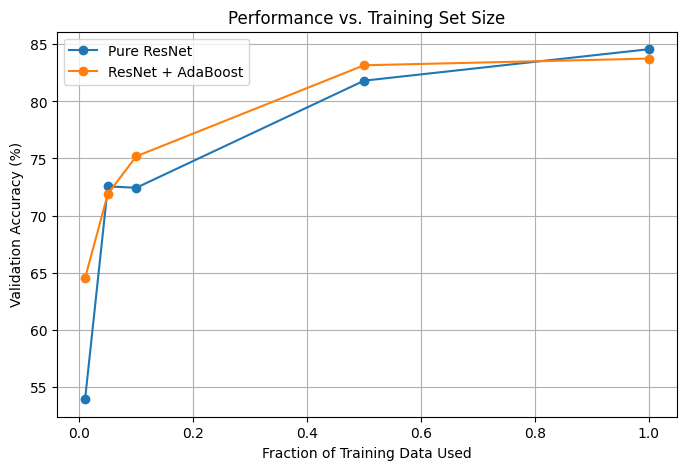

In [ ]:
# Convert accuracies to percentages
pure_pct  = [a * 100 for a in pure_resnet_accs]
hybrid_pct = [a * 100 for a in hybrid_accs]

#Plot results
plt.figure(figsize=(8, 5))
plt.plot(fractions, pure_pct,  '-o', label='Pure ResNet')
plt.plot(fractions, hybrid_pct,'-o', label='ResNet + AdaBoost')
plt.xlabel('Fraction of Training Data Used')
plt.ylabel('Validation Accuracy (%)')
plt.title('Performance vs. Training Set Size')
plt.legend()
plt.grid(True)
plt.show()


# Findings:

### Initially, when we started testing the baseline accuracy for the Resnet, it seemed relatively low compared to the hybrid model, but that was most likely because of the dataset being too small for the Resnet neural network.

### After increasing the dataset with additional MRI images, it turns out the the pure ResNet outpeforms the hybrid model when 100% of the training data is used, and when we limit the training data, the hybrid model seems to outperform the pure Resnet model.

### This is most likely because the full Resnet model can adjust all its layers to the data, and learn richer features than the hybrid model, and at lower data sizes, the Resnet + Adaboost performs better since it is able to generalize better.

# Which model is better?

### An argument can be made that neither model is better than the other. For example, when sample size is limited, the Resnet + Adaboost can be suitable for the task when it comes to image classification. However, if there is a lot of data available then clearly the pure Resnet model outperforms the Resnet + Adaboost hybrid approach. But not every hospital could have the resources or finances to pay a professional to go over thousands of MRIs and label them for training. In such a case, the hybrid model is the clear choice when resources are limited.